# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [43]:
# import numpy and pandas
import numpy as np
import pandas as pd
from scipy import stats

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [4]:
# Your code here:
salaries = pd.read_csv(r"..\data\Current_Employee_Names__Salaries__and_Position_Titles.csv")

Examine the `salaries` dataset using the `head` function below.

In [75]:
# Your code here:
salaries

,Name,Job Titles,Department,Full or Part-Time,Salary_or_Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
...,...,...,...,...,...,...,...,...
33697,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33698,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
33699,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
33700,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [7]:
# Your code here:
salaries.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25528
Annual Salary         8174
Hourly Rate          25528
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [9]:
# Your code here:
salaries.groupby(salaries["Salary or Hourly"])["Name"].count()

Salary or Hourly
Hourly     8174
Salary    25528
Name: Name, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [13]:
# Your code here:
salaries.groupby(salaries["Department"])[["Name"]].count()


,Name
Department,
ADMIN HEARNG,38
ANIMAL CONTRL,75
AVIATION,1856
BOARD OF ELECTION,111
BOARD OF ETHICS,8
BUDGET & MGMT,44
BUILDINGS,258
BUSINESS AFFAIRS,167
CITY CLERK,88


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [ ]:
salaries = salaries.rename(columns={"Salary or Hourly": "Salary_or_Hourly"})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C13463B08>]],
      dtype=object)

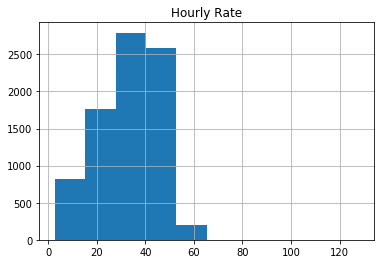

In [60]:
salaries[["Hourly Rate"]].loc[salaries["Salary_or_Hourly"]=="Hourly"].hist()


In [61]:
# Your code here:

hourly = salaries["Hourly Rate"].loc[salaries["Salary_or_Hourly"]=="Hourly"]
H0 = 30
alpha = 0.05

from scipy.stats import ttest_1samp

ttest_1samp(hourly, H0)

Ttest_1sampResult(statistic=31.211500329216044, pvalue=3.825475847673794e-202)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C1253C688>]],
      dtype=object)

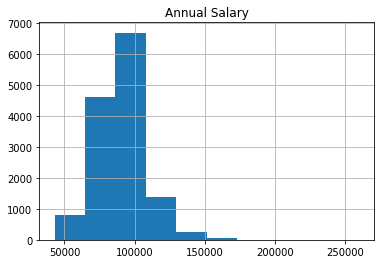

In [18]:
salaries[["Annual Salary"]].loc[salaries["Salary_or_Hourly"]=="Salary"].loc[salaries["Department"]=="POLICE"].hist()

In [20]:
# Your code here:
police_salary = salaries["Annual Salary"].loc[salaries["Salary_or_Hourly"]=="Salary"].loc[salaries["Department"]=="POLICE"]
H0 = 86000
ttest_1samp(police_salary, H0)


Ttest_1sampResult(statistic=18.51748561981861, pvalue=1.2239133904242963e-75)

Using the `crosstab` function, find the department that has the most hourly workers. 

In [25]:
# Your code here:

salaries_crosstab = pd.crosstab(salaries.Department,salaries.Salary_or_Hourly)


In [28]:
salaries_crosstab.sort_values(by="Hourly",ascending=False)

Salary_or_Hourly,Hourly,Salary
Department,,
STREETS & SAN,1846,329
WATER MGMNT,1558,356
AVIATION,1214,642
OEMC,1077,660
DAIS,745,288
TRANSPORTN,726,387
FAMILY & SUPPORT,357,299
PUBLIC LIBRARY,356,732
CITY COUNCIL,74,288


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

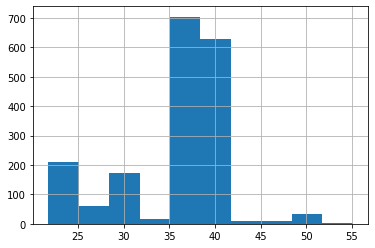

In [36]:
salaries["Hourly Rate"].loc[salaries["Salary_or_Hourly"]=="Hourly"].loc[salaries["Department"]=="STREETS & SAN"].hist()

In [40]:
# Your code here:

street_salary = salaries["Hourly Rate"].loc[salaries["Salary_or_Hourly"]=="Hourly"].loc[salaries["Department"]=="STREETS & SAN"]
H0 = 35
ttest_1samp(street_salary, H0)


Ttest_1sampResult(statistic=4.000138803968834, pvalue=6.580474443773579e-05)

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [44]:
# Your code here:

hourly = salaries["Hourly Rate"].loc[salaries["Salary_or_Hourly"]=="Hourly"]
mean, sigma = np.mean(hourly), np.std(hourly)
n = len(hourly)
df = n -1

stats.t.interval(0.95, df=df,loc=mean,scale=sigma/(n**0.5))

(34.298413012739545, 34.87448642450137)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [46]:
# Your code here:
police = salaries["Annual Salary"].loc[salaries["Salary_or_Hourly"]=="Salary"].loc[salaries["Department"]=="POLICE"]
mean, sigma = np.mean(police), np.std(police)
n = len(police)
df = n -1

stats.t.interval(0.95, df=df,loc=mean,scale=sigma/(n**0.5))

(88534.12913950197, 89134.10870772025)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [81]:
# Your code here:

from statsmodels.stats.proportion import proportions_ztest

p = len(salaries["Name"].loc[salaries["Salary_or_Hourly"]=="Hourly"])
n = len(salaries["Name"])
H0 = 0.25

stat, pval = proportions_ztest(p,n,H0)
pval

0.0013922864704323116

In [82]:
#p-value is 0.001 therefore we have to reject the null hypothesis that the propotion of hourly workers 
#in the City of Chicago is 25%